In [8]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report

from sklearn.ensemble import RandomForestClassifier

import time
import random
%matplotlib inline

# To  see no of column can visible
pd.set_option('display.max_columns',300)

In [9]:
df=pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\Gradient Boosting\telecom_churn.csv")

In [10]:
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [12]:
df.shape




(3333, 20)

0    2850
1     483
Name: churn, dtype: int64


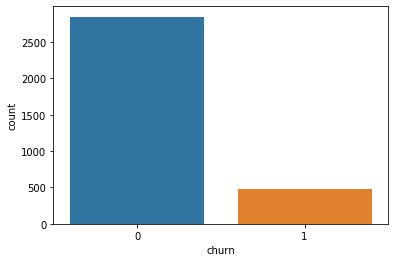

In [13]:
# Check the event rate of the data

print(df["churn"].value_counts())
plt.show()
sns.countplot(x="churn",data=df)

In [14]:
df["churn"].mean()

0.14491449144914492

# Missing Value Treatement

In [15]:
df.isnull().sum()


# No missing value is present

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [16]:
# Removing Unnecessary Variable "Area Code"
df=df.drop("area code",axis=1)

# Split Dependent & Independent Variable

In [17]:
X=df.drop("churn",axis=1)
Y=df["churn"]

# Encoding Categorical Features

In [18]:
chk=df.select_dtypes(include="object")

In [19]:
chk.dtypes

state                 object
international plan    object
voice mail plan       object
dtype: object

In [20]:
chk_dum=pd.get_dummies(chk)
chk_dum

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3331,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [21]:
X_num=X.drop(chk,axis=1)
X_num.dtypes

account length              int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [22]:
X_all=pd.concat([X_num,chk_dum],axis=1,join="inner")
X_all

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# Outlier Treatment

In [23]:


X_all_f.quantile([0.01,0.99])

NameError: name 'X_all_f' is not defined

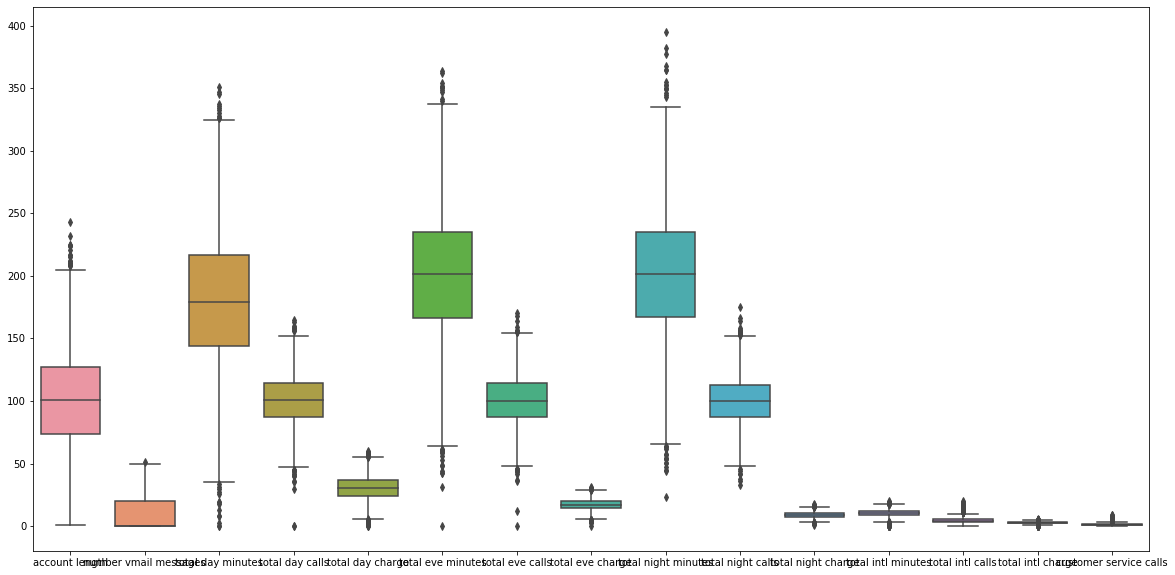

In [24]:
plt.show()
plt.subplots(figsize=(20,10))
sns.boxplot(data=X_num)


# from the box plot is had been seen that outliers are present in the data. so we have to remove these outliers

In [25]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

X_num1=X_num.apply(lambda x: outlier_capping(x))
X_num1.describe()



,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,100.110447,9.035696,10.250945,4.467447,2.768269,1.557156
std,39.276205,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,19.223828,2.228369,2.700478,2.376841,0.729117,1.292043
min,12.320000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,3.576400,3.332000,1.000000,0.899600,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,195.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,146.680000,14.284000,16.668000,13.000000,4.500400,6.000000


In [26]:
X_final=pd.concat([X_num1,chk_dum],axis=1,join="inner")


# Remove the Feature with Zero Variance

In [27]:
from sklearn.feature_selection import VarianceThreshold
var_cutof=VarianceThreshold()
var_cutof.fit_transform(X_final)

array([[128. ,  25. , 265.1, ...,   0. ,   0. ,   1. ],
       [107. ,  26. , 161.6, ...,   0. ,   0. ,   1. ],
       [137. ,   0. , 243.4, ...,   0. ,   1. ,   0. ],
       ...,
       [ 28. ,   0. , 180.8, ...,   0. ,   1. ,   0. ],
       [184. ,   0. , 213.8, ...,   1. ,   1. ,   0. ],
       [ 74. ,  25. , 234.4, ...,   0. ,   0. ,   1. ]])

In [28]:
X_all_f=pd.DataFrame(var_cutof.fit_transform(X_final),index=X_final.index,columns=X_final.columns)

X_all_f.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,100.110447,9.035696,10.250945,4.467447,2.768269,1.557156,0.015602,0.024002,0.016502,0.019202,0.010201,0.019802,0.022202,0.016202,0.018302,0.018902,0.016202,0.015902,0.013201,0.021902,0.017402,0.021302,0.021002,0.017702,0.015302,0.019502,0.021002,0.018602,0.021902,0.025203,0.018902,0.019502,0.020402,0.020402,0.018602,0.018302,0.016802,0.020402,0.018602,0.019802,0.024902,0.023402,0.018302,0.023402,0.013501,0.019502,0.018002,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.276205,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,19.223828,2.228369,2.700478,2.376841,0.729117,1.292043,0.123947,0.153079,0.127414,0.137255,0.100499,0.139340,0.147363,0.126269,0.134061,0.136199,0.126269,0.125114,0.114153,0.146386,0.130782,0.144411,0.143413,0.131885,0.122768,0.138302,0.143413,0.135134,0.146386,0.156763,0.136199,0.138302,0.141392,0.141392,0.135134,0.134061,0.128547,0.141392,0.135134,0.139340,0.155851,0.151200,0.134061,0.151200,0.115426,0.138302,0.132978,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,12.320000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,3.576400,3.332000,1.000000,0.899600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

# Train_Test_Split


In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_all_f,Y,test_size=0.2, random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)

(2666, 70)
(667, 70)


In [47]:
# Check for randomness of train and test by testing the event rates across the two datasets
print(y_train.mean())
print(y_test.mean())

0.14328582145536384
0.15142428785607195


# Building the Classification Model

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0)
clf.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
#from xgboost import XGBClassifier
#xgb=XGBClassifier(random_state=0)
#xgb.fit(x_train,y_train)

# Class Predictions


In [57]:
y_pred_gb=clf.predict(x_test)
y_pred_tree=dtree.predict(x_test)
y_pred_rf=rf.predict(x_test)
#y_pred_xgb=xgb.predict(X_test)

y_pred1_gb=clf.predict(X_all_f)
y_pred_tree1=dtree.predict(X_all_f)
y_pred_rf1=rf.predict(X_all_f)
#y_pred_xgb1=xgb.predict(X)


# Model Evaluation

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
confusion_matrix(Y, y_pred1)


Accuracy: 0.9445277361319341
Precision 0.8902439024390244
Recall 0.7227722772277227
f1_score 0.7978142076502732


array([[2839,   11],
       [  96,  387]], dtype=int64)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))
confusion_matrix(Y, y_pred_tree1)

Accuracy: 0.9160419790104948
Precision 0.7184466019417476
Recall 0.7326732673267327
f1_score 0.7254901960784315


array([[2821,   29],
       [  27,  456]], dtype=int64)

In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))
confusion_matrix(Y, y_pred_rf1)

Accuracy: 0.9415292353823088
Precision 0.9558823529411765
Recall 0.6435643564356436
f1_score 0.7692307692307693


array([[2847,    3],
       [  37,  446]], dtype=int64)

# ROC_AUC Score

In [65]:
metrics.roc_auc_score(y_test,y_pred)

0.8534356085785257

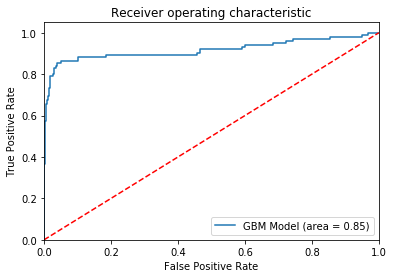

In [71]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc=roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='GBM Model (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Visualizing the Model Performance - Lorenz Curve

In [ ]:
#Decsion Tree Lorenz Curve

In [72]:
y_pred_prob = dtree.predict_proba(X_all_f)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.946108,316.0,316.0,0.654244,0.654244,0.10021,0.10021,1,6.528731
1,9,333,0.423423,141.0,457.0,0.291925,0.946170,0.09991,0.20012,2,4.728012
2,8,333,0.015015,5.0,462.0,0.010352,0.956522,0.09991,0.30003,3,3.188087
3,7,333,0.021021,7.0,469.0,0.014493,0.971014,0.09991,0.39994,4,2.427900
4,6,333,0.006006,2.0,471.0,0.004141,0.975155,0.09991,0.49985,5,1.950896
5,5,334,0.005988,2.0,473.0,0.004141,0.979296,0.10021,0.60006,6,1.631997
6,4,333,0.012012,4.0,477.0,0.008282,0.987578,0.09991,0.69997,7,1.410886
7,3,333,0.006006,2.0,479.0,0.004141,0.991718,0.09991,0.79988,8,1.239834
8,2,333,0.006006,2.0,481.0,0.004141,0.995859,0.09991,0.89979,9,1.106769
9,1,334,0.005988,2.0,483.0,0.004141,1.000000,0.10021,1.00000,10,1.000000


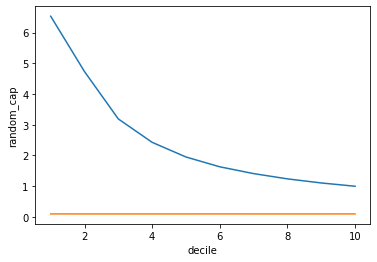

In [73]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [ ]:
# GBM Model Lorenz Curve

In [74]:
y_pred_prob = clf.predict_proba(X_all_f)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.991018,331.0,331.0,0.685300,0.685300,0.10021,0.10021,1,6.838639
1,9,333,0.318318,106.0,437.0,0.219462,0.904762,0.09991,0.20012,2,4.521097
2,8,333,0.033033,11.0,448.0,0.022774,0.927536,0.09991,0.30003,3,3.091478
3,7,333,0.027027,9.0,457.0,0.018634,0.946170,0.09991,0.39994,4,2.365779
4,6,333,0.018018,6.0,463.0,0.012422,0.958592,0.09991,0.49985,5,1.917760
5,5,334,0.023952,8.0,471.0,0.016563,0.975155,0.10021,0.60006,6,1.625096
6,4,333,0.006006,2.0,473.0,0.004141,0.979296,0.09991,0.69997,7,1.399054
7,3,333,0.021021,7.0,480.0,0.014493,0.993789,0.09991,0.79988,8,1.242422
8,2,333,0.003003,1.0,481.0,0.002070,0.995859,0.09991,0.89979,9,1.106769
9,1,334,0.005988,2.0,483.0,0.004141,1.000000,0.10021,1.00000,10,1.000000


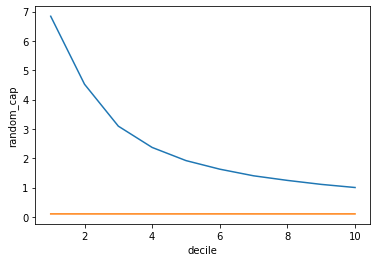

In [75]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [76]:
# Suppose we have to display the data till 4rd decile

df.groupby("P_Rank_RF")['y_pred_P'].agg(["min","max"])

,min,max
P_Rank_RF,,
1,0.004269,0.016632
2,0.016635,0.020409
3,0.020432,0.023700
4,0.023702,0.027189
5,0.027262,0.031195
6,0.031206,0.037965
7,0.037982,0.053360
8,0.053365,0.100089
9,0.100179,0.701565


In [78]:
df[df['y_pred_P']<=0.023700]

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,y_pred_P,P_Rank_RF
11,RI,74,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0,0.020526,3
16,ID,85,no,yes,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,0,0.014313,1
17,VT,93,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0.011730,1
18,VA,76,no,yes,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10.0,5,2.70,1,0,0.018521,2
22,AZ,130,no,no,0,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,9.5,19,2.57,0,0,0.014075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,ME,149,no,yes,18,148.5,106,25.25,114.5,106,9.73,178.3,98,8.02,6.5,4,1.76,0,0,0.020158,2
3316,MS,103,no,yes,29,164.1,111,27.90,219.1,96,18.62,220.3,108,9.91,12.3,9,3.32,0,0,0.014962,1
3321,VT,60,no,no,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0,0.010750,1
3325,OH,78,no,no,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,0,0.019836,2
